In [1]:

##
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

##

/kaggle/input/vehicle-dataset-from-cardekho/CAR DETAILS FROM CAR DEKHO.csv
/kaggle/input/vehicle-dataset-from-cardekho/car data.csv


In [2]:
cars_filepath = "C:\Windows\System32\cmd.exe"
cars = pd.read_csv(cars_filepath)

In [3]:
cars.columns

Index(['name', 'year', 'selling_price', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner'],
      dtype='object')

In [4]:
cars.shape

(4340, 8)

In [5]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4340 entries, 0 to 4339
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   name           4340 non-null   object
 1   year           4340 non-null   int64 
 2   selling_price  4340 non-null   int64 
 3   km_driven      4340 non-null   int64 
 4   fuel           4340 non-null   object
 5   seller_type    4340 non-null   object
 6   transmission   4340 non-null   object
 7   owner          4340 non-null   object
dtypes: int64(3), object(5)
memory usage: 271.4+ KB


In [6]:
cars.head(10)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner
5,Maruti Alto LX BSIII,2007,140000,125000,Petrol,Individual,Manual,First Owner
6,Hyundai Xcent 1.2 Kappa S,2016,550000,25000,Petrol,Individual,Manual,First Owner
7,Tata Indigo Grand Petrol,2014,240000,60000,Petrol,Individual,Manual,Second Owner
8,Hyundai Creta 1.6 VTVT S,2015,850000,25000,Petrol,Individual,Manual,First Owner
9,Maruti Celerio Green VXI,2017,365000,78000,CNG,Individual,Manual,First Owner


In [7]:
cars.describe()

,year,selling_price,km_driven
count,4340.000000,4.340000e+03,4340.000000
mean,2013.090783,5.041273e+05,66215.777419
std,4.215344,5.785487e+05,46644.102194
min,1992.000000,2.000000e+04,1.000000
25%,2011.000000,2.087498e+05,35000.000000
50%,2014.000000,3.500000e+05,60000.000000
75%,2016.000000,6.000000e+05,90000.000000
max,2020.000000,8.900000e+06,806599.000000


In [8]:
cars.name.describe()

count                       4340
unique                      1491
top       Maruti Swift Dzire VDI
freq                          69
Name: name, dtype: object

**Data Visualization**
* Plotting graphs to check for relations between different independent variables and the dependent variable
* Making use of Seaborn library to plot bar graphs and regression scatter plots

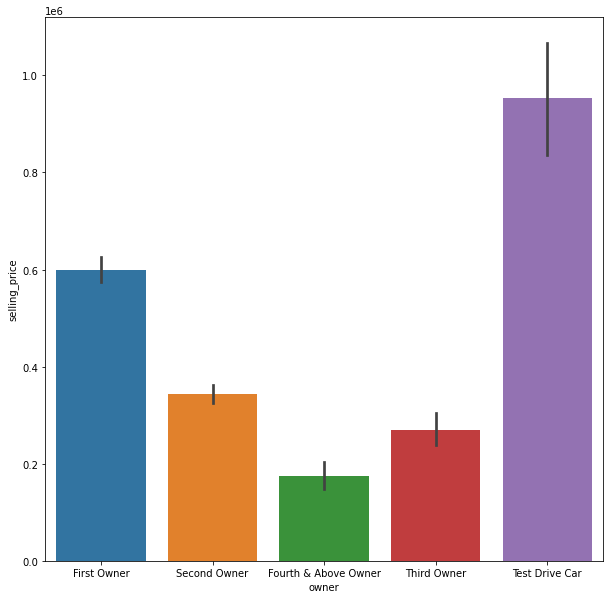

In [9]:
plt.figure(figsize = (10,10))
sns.barplot(x = 'owner', y = 'selling_price', data = cars)

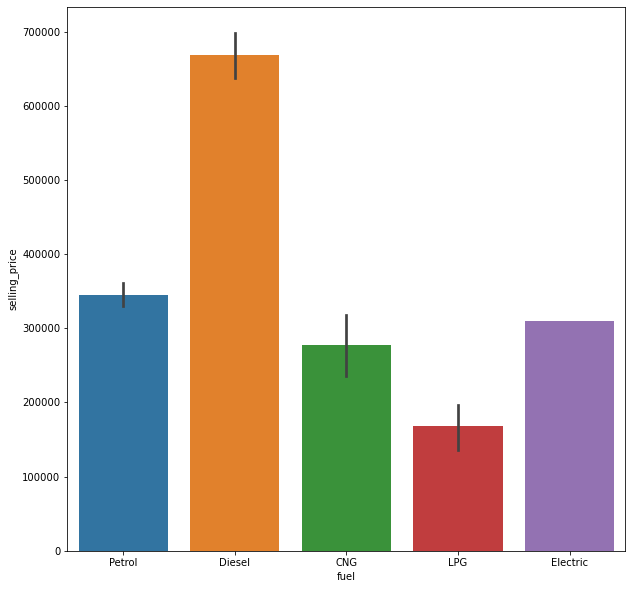

In [10]:
plt.figure(figsize = (10,10))
sns.barplot(x = 'fuel', y = 'selling_price', data = cars)

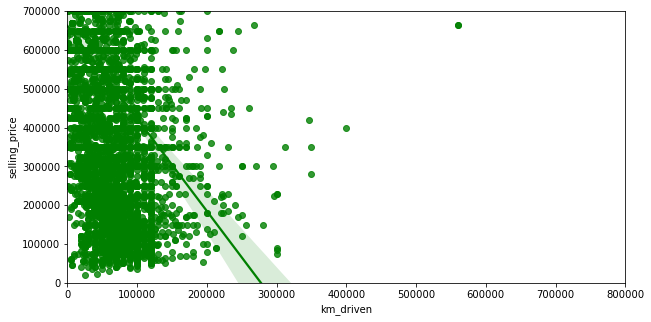

In [11]:
plt.figure(figsize = (10,5))
plt.ylim(0,700000)
plt.xlim(0,800000)
sns.regplot(x = 'km_driven', y = 'selling_price', data = cars, color = 'green')

**Model Selection and Validation**
* Defining training and testing data
* Importing different models from sklearn libraries implementing their functions
* Fitting the training data into the model 
* Extracting the predicted value from the implemented model
* Calculating the Mean Absloute Error to check how accurate the model is

In [12]:
cars_copy = cars.copy()

In [13]:
lst = (cars_copy.dtypes == 'object')
object_col = list(lst[lst].index)
print(object_col)

['name', 'fuel', 'seller_type', 'transmission', 'owner']


In [14]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
for col in object_col:
    cars_copy[col] = encoder.fit_transform(cars_copy[col])

In [15]:
attributes = ['name','year', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner']
X = cars_copy[attributes]
y = cars_copy.selling_price

In [16]:
from sklearn.model_selection import train_test_split
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size = 0.6, random_state = 0)

In [17]:
from sklearn.linear_model import LinearRegression

regressor = LinearRegression()
regressor.fit(X_train,y_train)

print(regressor.intercept_)
print(regressor.coef_)

-71630869.59988928
[-6.00776026e+01  3.63947020e+04 -6.56700224e-01 -9.93829283e+04
 -3.59802631e+04 -8.44508278e+05 -2.26649579e+04]


In [18]:
y_pred = regressor.predict(X_valid)
print(y_pred)
print(y_valid)

[1418211.91519161 1475445.81355424  165184.46647356 ...  512633.08892478
  492126.94509409  711928.31774773]
2089     465000
1077    1580000
1495     150000
555     4950000
2615     125000
         ...   
4022     200000
2053     150000
55       401000
3462     300000
1677     500000
Name: selling_price, Length: 2604, dtype: int64


In [19]:
from sklearn.metrics import mean_absolute_error
print(mean_absolute_error(y_valid, y_pred))

232703.11594191624


In [20]:
from sklearn.tree import DecisionTreeRegressor
tree = DecisionTreeRegressor(max_leaf_nodes = 700, random_state = 0)
tree.fit(X_train,y_train)
tree_y_pred = tree.predict(X_valid)
tree_y_pred
print(mean_absolute_error(y_valid,tree_y_pred))

157809.3256210978


In [21]:
from sklearn.ensemble import RandomForestRegressor
forest = RandomForestRegressor(random_state=1)
forest.fit(X_train, y_train)
forest_y = forest.predict(X_valid)
print(mean_absolute_error(y_valid, forest_y))

124937.86532712038
